<a href="https://colab.research.google.com/github/Harshavardhan1005/Diabetes_prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/kaggle_diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# Check Data for any missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Independent and Dependent variables
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [7]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]

In [8]:
# Create the param grid
param_grid = {'n_estimators': n_estimators}

In [9]:
rf = RandomForestClassifier()

# Grid Search CV

In [10]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [11]:
# Best parameter
grid_search.best_params_

{'n_estimators': 27}

In [12]:
# Best estimator
model_gridsearch = grid_search.best_estimator_

In [13]:
# Accuracy
pred = model_gridsearch.predict(x_test)
print(accuracy_score(pred,y_test)*100)

98.5


# Randomized Search CV

In [14]:
random_search = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=10)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [15]:
# Best Parameter
random_search.best_params_

{'n_estimators': 32}

In [16]:
# Best estimator
model_randomsearch = random_search.best_estimator_

In [17]:
# Accuracy Score
pred = model_randomsearch.predict(x_test)
print(accuracy_score(pred,y_test)*100)

98.25


In [18]:
# Load the model with pickle
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(model_randomsearch, open(filename, 'wb'))

In [19]:
# Getting feature importances
imp_features = pd.Series(model_randomsearch.feature_importances_,index = x.columns)
imp_features.sort_values(ascending = False)

Glucose                     0.234697
BMI                         0.169011
Age                         0.149405
DiabetesPedigreeFunction    0.124114
BloodPressure               0.090671
Insulin                     0.080389
Pregnancies                 0.079740
SkinThickness               0.071973
dtype: float64

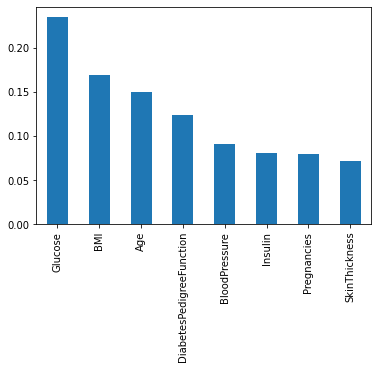

In [20]:
# Plotting feature importances 
imp_features.sort_values(ascending = False).plot(kind = "bar")

1. Gridsearch CV is used when the dataset is small. It takes more time
2. Randomizedsearch CV is used when the dataset is too large. It takes less time